In [1]:
# necessary imports
import sys
import pandas as pd
import dvc.api
import warnings
warnings.filterwarnings('ignore')

In [2]:
# adding and setting up scripts
sys.path.append('.')
sys.path.append('..')
sys.path.insert(1, '../scripts/')
import defaults as defs

In [18]:
# version of the data
# v1: raw-data
version= 'v1'

# set up the data url
data1= dvc.api.get_url(path= defs.data1,         		# path to the data file
		                  repo= defs.repo,              # path to the repository
		                  rev= version)                 # version of the data

data2= dvc.api.get_url(path= defs.data2,         		# path to the data file
		                  repo= defs.repo,              # path to the repository
		                  rev= version)                 # version of the data

In [8]:
date = ['Trip Start Time', 'Trip End Time'] # the date column name
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

# read CSV 
df1 = pd.read_csv(data1, na_values=missing_values, parse_dates=date)
df2 = pd.read_csv(data2, na_values=missing_values)

In [24]:
df1[:7]

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12


In [16]:
df1.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time'],
      dtype='object')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           536020 non-null  int64         
 1   Trip Origin       536020 non-null  object        
 2   Trip Destination  536020 non-null  object        
 3   Trip Start Time   534369 non-null  datetime64[ns]
 4   Trip End Time     536019 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 20.4+ MB


In [20]:
df1['Trip ID'].min(), df1['Trip ID'].max()

(391996, 1637709)

In [21]:
df1['Trip ID'].value_counts().unique

<bound method Series.unique of 391996     1
1180070    1
1180061    1
1180060    1
1180059    1
          ..
789757     1
789755     1
789751     1
789750     1
1637709    1
Name: Trip ID, Length: 536020, dtype: int64>

In [23]:
df2[:7]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN


In [7]:
df2.driver_action.value_counts()

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

In [25]:
df2.order_id.value_counts()

401129    4122
401849    3360
415800    2922
418106    2617
405195    2129
          ... 
427525       1
427528       1
427537       1
427549       1
418710       1
Name: order_id, Length: 26492, dtype: int64

In [17]:
df2.order_id.min(), df2.order_id.max()

(392001, 517948)

In [38]:
df2.order_id.value_counts()

401129    4122
401849    3360
415800    2922
418106    2617
405195    2129
          ... 
427525       1
427528       1
427537       1
427549       1
418710       1
Name: order_id, Length: 26492, dtype: int64

In [45]:
len(df2.order_id.value_counts().unique())

707

<AxesSubplot:>

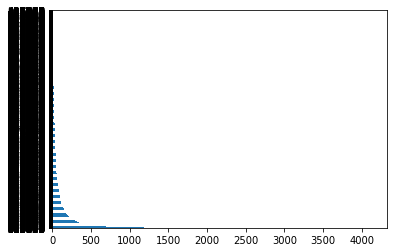

In [93]:
df2.order_id.value_counts().plot(kind='barh')

In [90]:
df2.order_id.value_counts()[:15]

401129    4122
401849    3360
415800    2922
418106    2617
405195    2129
399033    1929
424728    1861
430557    1833
394949    1766
408037    1720
402014    1713
398749    1698
412176    1673
404337    1661
415784    1614
Name: order_id, dtype: int64

In [79]:
df2.driver_id.min(), df2.driver_id.max(), 

(121981, 247877)

In [76]:
df2.driver_id.value_counts()

245538    6941
243020    6447
242971    6258
243676    5884
243932    5793
          ... 
245840       1
247182       1
245907       1
246082       1
246602       1
Name: driver_id, Length: 1213, dtype: int64

In [75]:
df2.driver_id.value_counts().keys().unique()

Int64Index([245538, 243020, 242971, 243676, 243932, 171165, 243581, 244121,
            244031, 243826,
            ...
            247709, 246615, 245756, 247508, 247794, 245840, 247182, 245907,
            246082, 246602],
           dtype='int64', length=1213)

<AxesSubplot:>

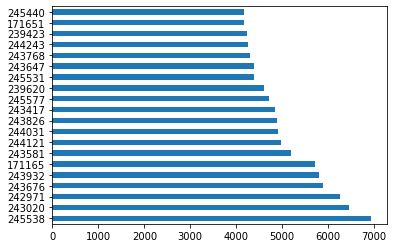

In [89]:
df2.driver_id.value_counts()[:20].plot(kind='barh')